In [1]:

# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
sns.set(style="whitegrid")


In [3]:
# Load raw data
raw_data_path = "../data/raw/data.csv" 
df = pd.read_csv(raw_data_path)

df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:
# Check shape of the dataset
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

df.info()
df.describe()


Rows: 95662, Columns: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [5]:
# Count missing values per column
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_percent = (df.isnull().mean() * 100).sort_values(ascending=False)
pd.DataFrame({"MissingCount": missing_values, "MissingPercent": missing_values_percent})


,MissingCount,MissingPercent
TransactionId,0,0.0
BatchId,0,0.0
AccountId,0,0.0
SubscriptionId,0,0.0
CustomerId,0,0.0
CurrencyCode,0,0.0
CountryCode,0,0.0
ProviderId,0,0.0
ProductId,0,0.0
ProductCategory,0,0.0


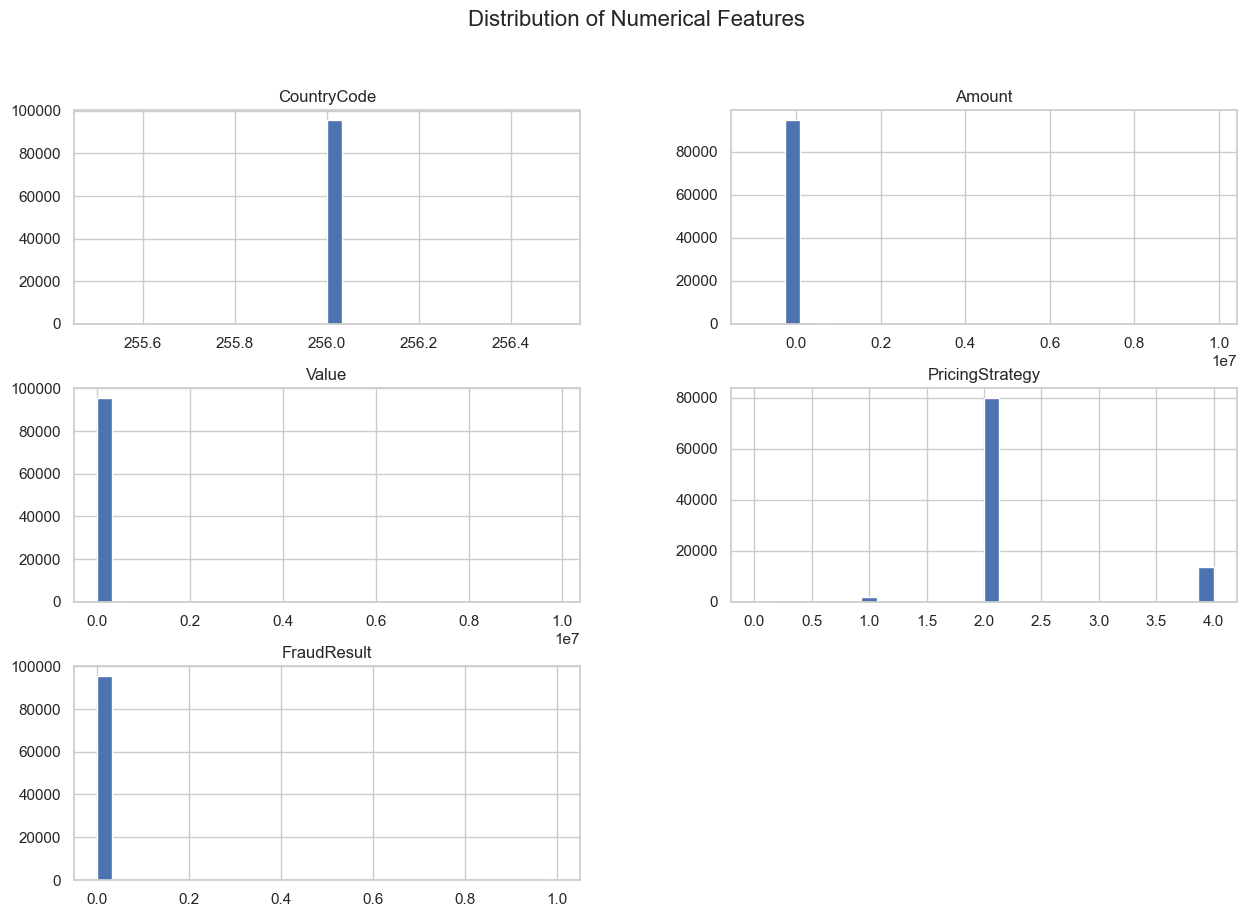

In [6]:
# List numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[numerical_features].hist(bins=30, figsize=(15,10))
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


Column: TransactionId
TransactionId
TransactionId_35670     1
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
TransactionId_28195     1
TransactionId_23223     1
TransactionId_118063    1
TransactionId_100640    1
TransactionId_51905     1
Name: count, dtype: int64
----------------------------------------
Column: BatchId
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_49408      7
BatchId_110084     7
BatchId_34879      6
BatchId_86880      6
Name: count, dtype: int64
----------------------------------------
Column: AccountId
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
AccountId_10        965
AccountId_3595      465
AccountId_751       411
AccountId_2648      359
AccountId_2314      356
Name: count, dtype: int64
----------------------------------------
C

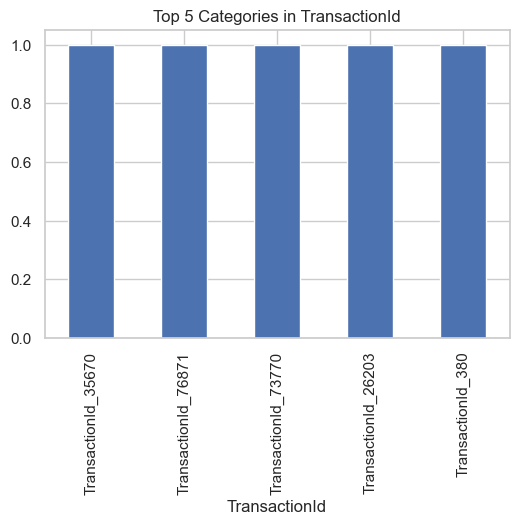

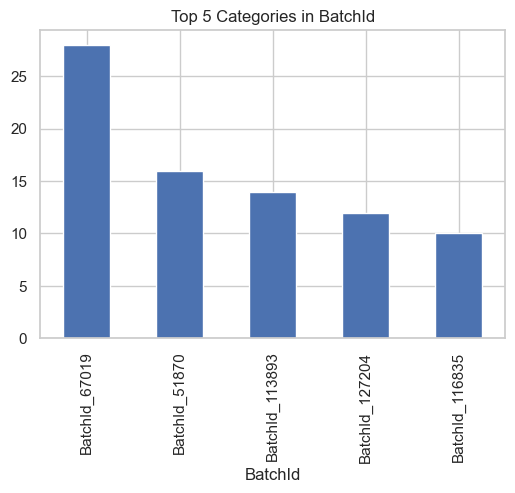

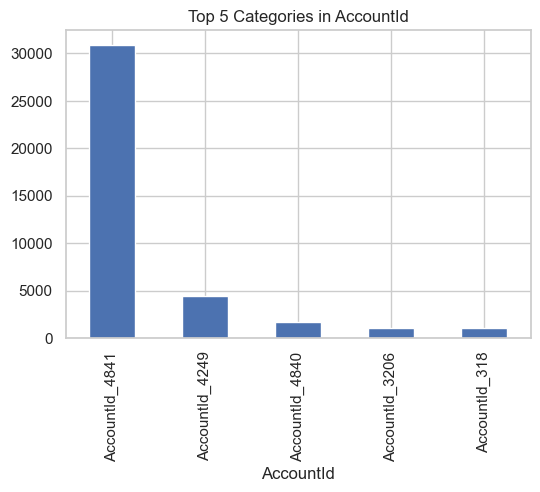

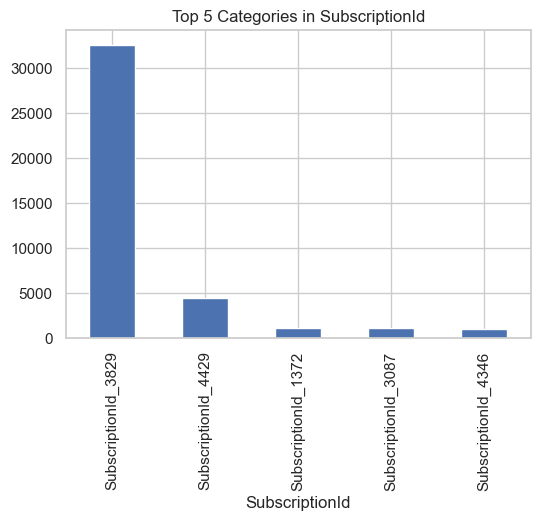

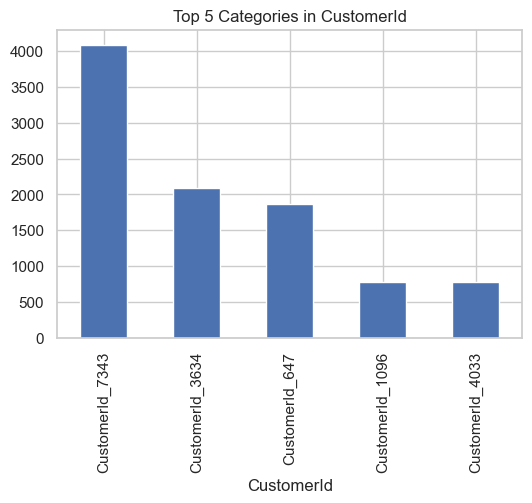

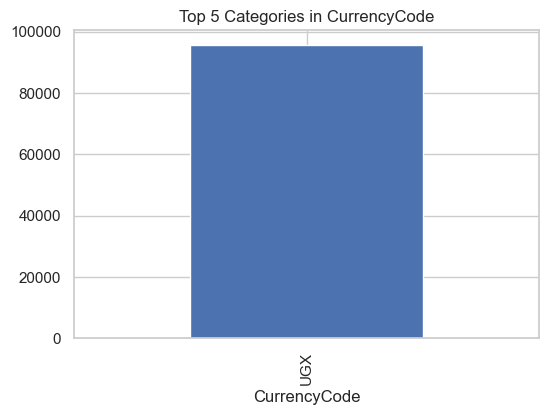

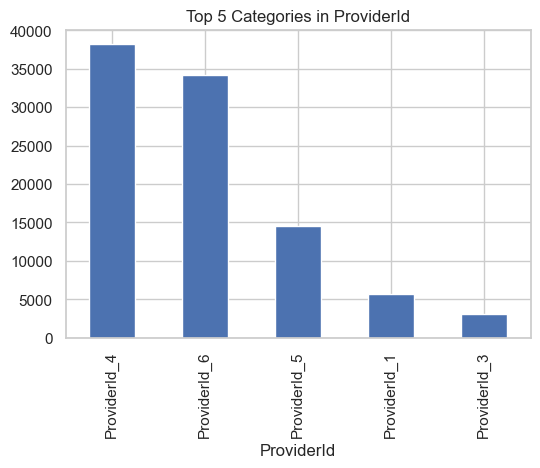

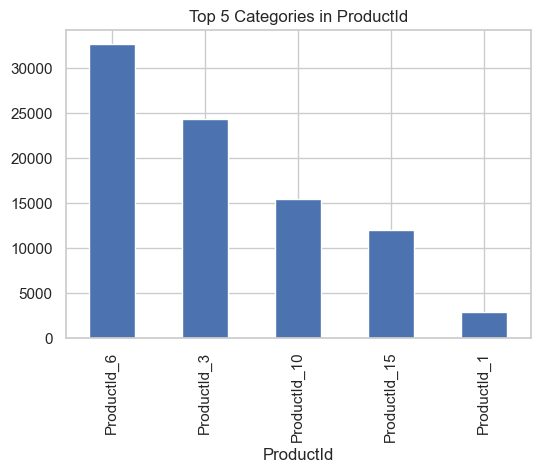

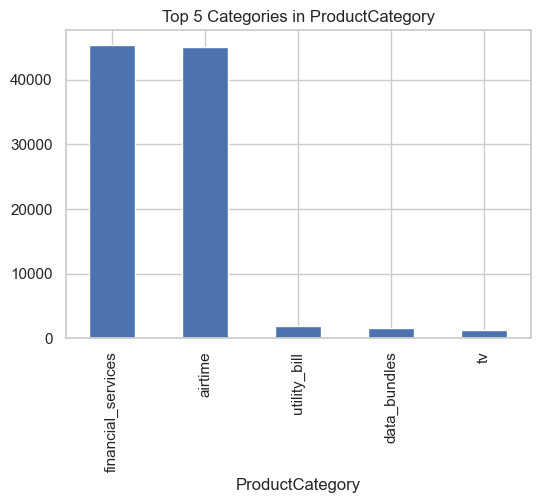

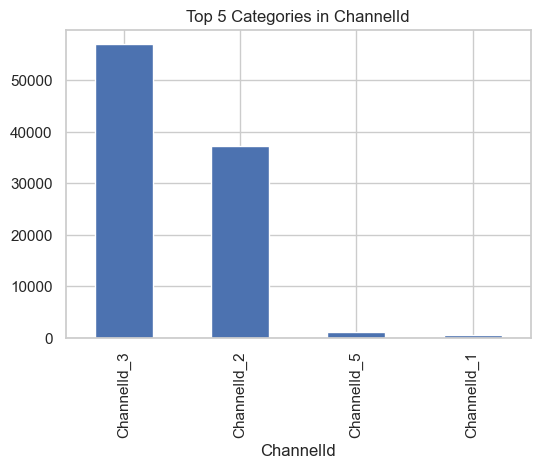

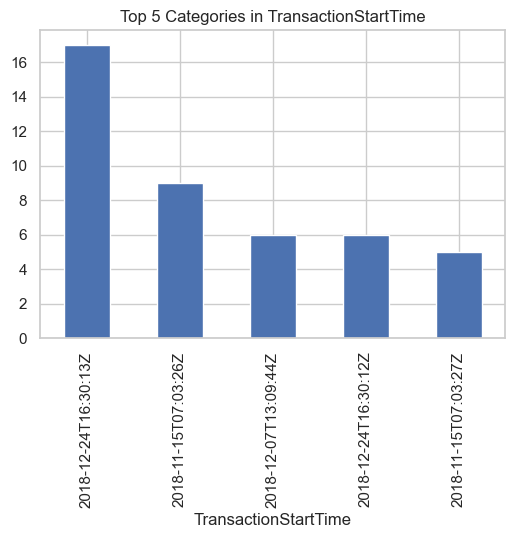

In [7]:
# List categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_features:
    print(f"Column: {col}")
    print(df[col].value_counts().head(10))
    print("-" * 40)
    
for col in categorical_features:
    plt.figure(figsize=(6,4))
    df[col].value_counts().nlargest(5).plot(kind='bar')
    plt.title(f"Top 5 Categories in {col}")
    plt.show()


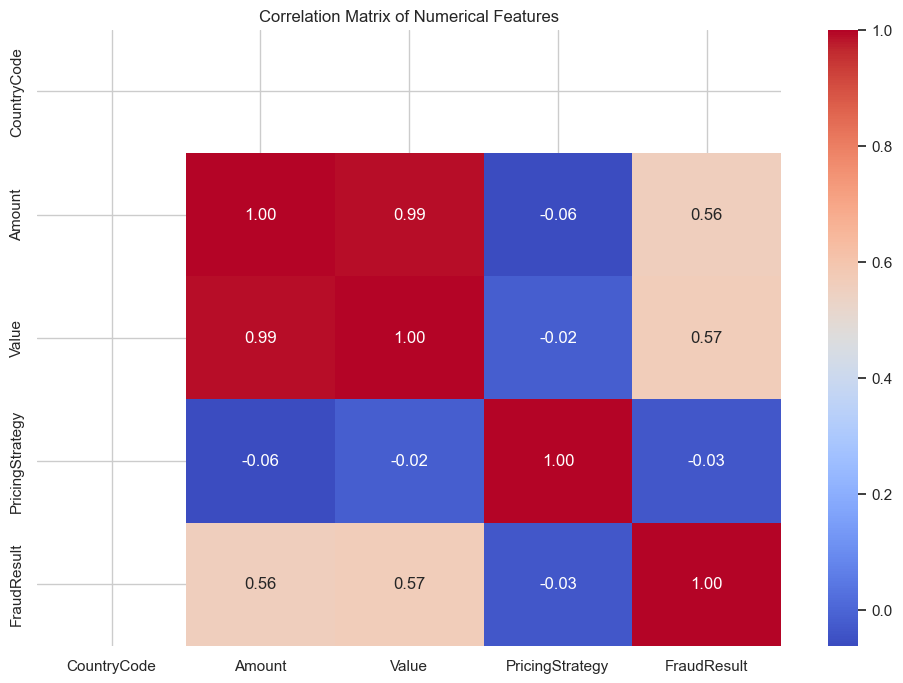

In [8]:
# Correlation matrix
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


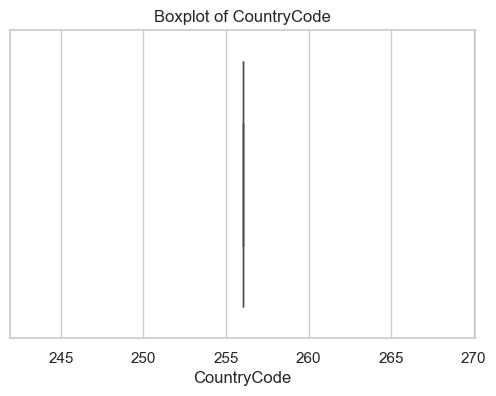

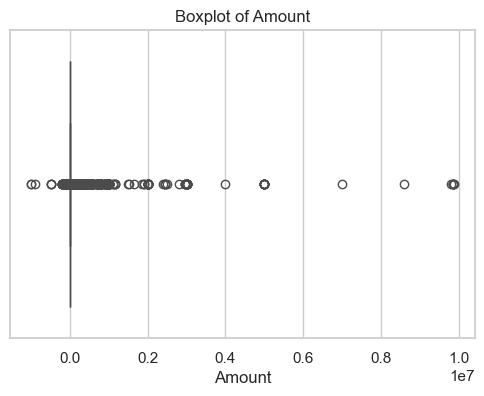

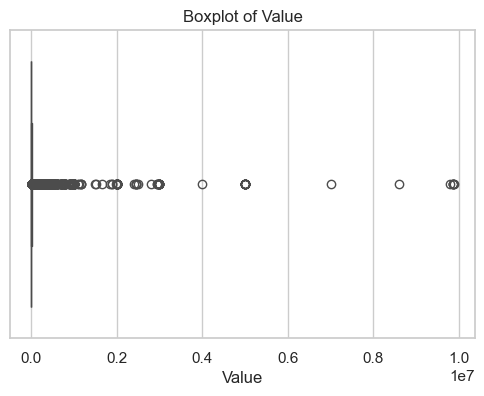

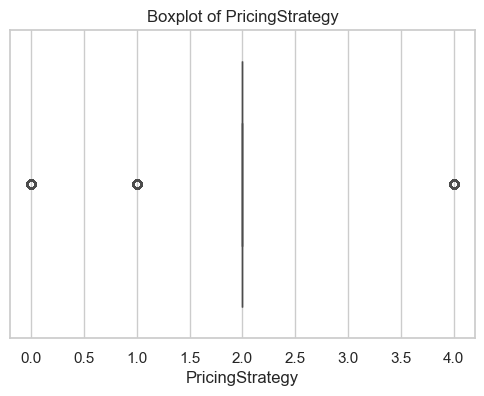

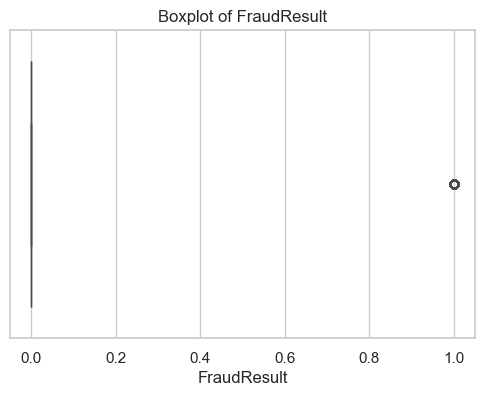

In [9]:
# Boxplots for numerical features
for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


C:\Users\weldi\AppData\Local\Temp\ipykernel_14196\2822984943.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], infer_datetime_format=True)


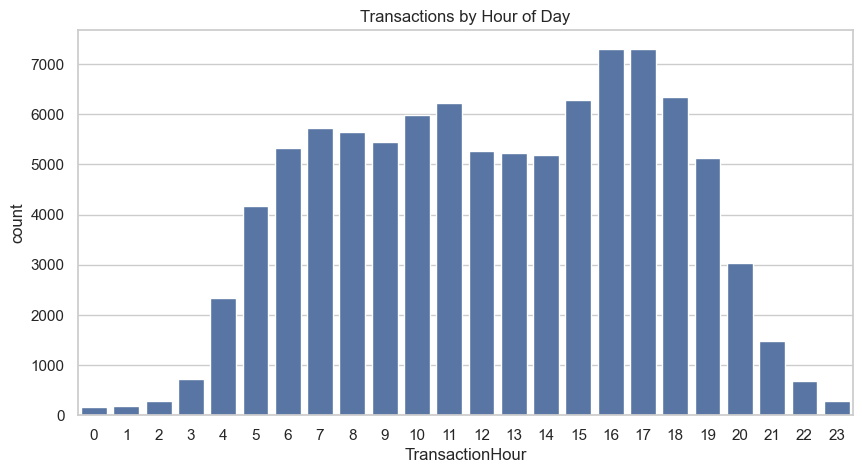

In [11]:
# Convert transaction time to datetime (faster)
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], infer_datetime_format=True)

# Extract hour, day, month
df['TransactionHour'] = df['TransactionStartTime'].dt.hour
df['TransactionDay'] = df['TransactionStartTime'].dt.day
df['TransactionMonth'] = df['TransactionStartTime'].dt.month

# Plot transactions per hour
plt.figure(figsize=(10,5))
sns.countplot(x=df['TransactionHour'])
plt.title("Transactions by Hour of Day")
plt.show()




In [12]:
# Quick aggregation for EDA purposes
rfm_df = df.groupby('CustomerId').agg({
    'TransactionStartTime': lambda x: (df['TransactionStartTime'].max() - x.max()).days,
    'TransactionId': 'count',
    'Amount': 'sum'
}).rename(columns={
    'TransactionStartTime': 'Recency',
    'TransactionId': 'Frequency',
    'Amount': 'Monetary'
})

rfm_df.head()


,Recency,Frequency,Monetary
CustomerId,,,
CustomerId_1,83,1,-10000.0
CustomerId_10,83,1,-10000.0
CustomerId_1001,89,5,20000.0
CustomerId_1002,25,11,4225.0
CustomerId_1003,11,6,20000.0


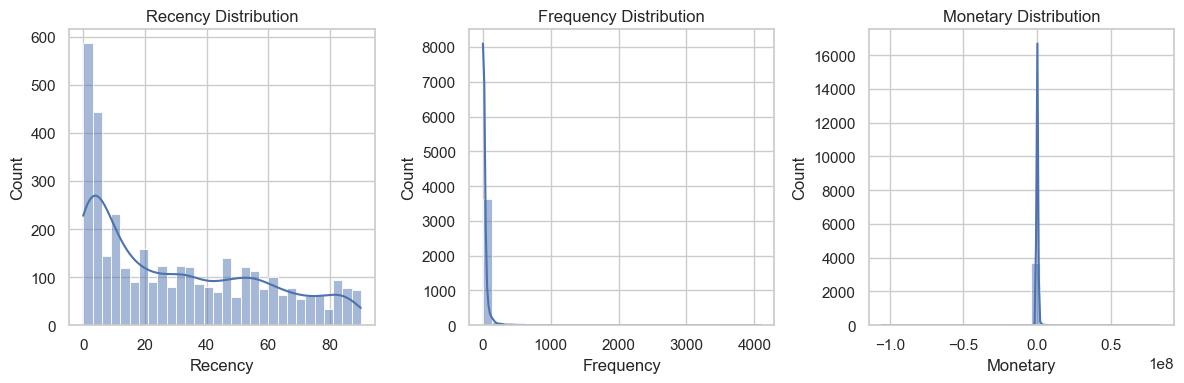

In [13]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.histplot(rfm_df['Recency'], bins=30, kde=True)
plt.title("Recency Distribution")

plt.subplot(1,3,2)
sns.histplot(rfm_df['Frequency'], bins=30, kde=True)
plt.title("Frequency Distribution")

plt.subplot(1,3,3)
sns.histplot(rfm_df['Monetary'], bins=30, kde=True)
plt.title("Monetary Distribution")

plt.tight_layout()
plt.show()



"""
# Top Insights from EDA

1. Identify missing values and imputation strategies.
2. Detect features with skewed distributions that may need log transformation.
3. Highlight potential high-risk customer behaviors from RFM analysis.
4. Correlations among numerical variables indicate candidate features for the model.
5. Temporal patterns (transaction hour, day, month) can inform feature engineering.
"""
